In [2]:
# for data processing

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*

In [3]:
train=pd.read_excel('Final_Train.xlsx')
test=pd.read_excel('Final_Test.xlsx')

In [4]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


### Pre-processing



Miscellaneaous column

      As the column holds special infomation and blank spaces also, we are going to treat all the non-null as '1' and others as '0'.



In [8]:


for i in train['Miscellaneous_Info'].value_counts().index:
  train['Miscellaneous_Info'].replace(i,int(1),inplace=True)
train['Miscellaneous_Info'].fillna(int(0),inplace=True)

for i in test['Miscellaneous_Info'].value_counts().index:
  test['Miscellaneous_Info'].replace(i,int(1),inplace=True)
test['Miscellaneous_Info'].fillna(int(0),inplace=True)





Experience

  We'll discard all the texts and only put the numeric value there.



In [9]:
for i in train['Experience'].value_counts().index:
  ww=i.split()
  train['Experience'].replace(i,int(ww[0]),inplace=True)

for i in test['Experience'].value_counts().index:
  ww=i.split()
  test['Experience'].replace(i,int(ww[0]),inplace=True)



Place

We will split the area and the city into two different features as they can give us hints about the fees.



In [10]:
train['Place'].fillna('None,None',inplace=True)
test['Place'].fillna('None,None',inplace=True)



Now we are going separate the comma separated two types-city and area.


In [11]:
train['Area']=train['Place'].str.rsplit(',',1).str.get(0)
train['City']=train['Place'].str.rsplit(',',1).str.get(1)
test['Area']=test['Place'].str.rsplit(',',1).str.get(0)
test['City']=test['Place'].str.split(',',1).str.get(1)

train['City']=train['City'].str.strip()
test['City']=test['City'].str.strip()


In [12]:
train['Area'].isnull().sum(),test['Area'].isnull().sum(),train['City'].isnull().sum(),test['City'].isnull().sum()

(0, 0, 1, 0)

In [13]:
train[train['City'].isnull()]


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
3980,BDS,23,NaN,e,Dentist,0.0,250,e,NaN




we are going to make this column 'None' for city and area both


In [14]:
train.loc[train['City'].isnull(),'Area']='None'
train['City']=train['City'].fillna('None')

In [15]:
train['Area'].isnull().sum(),test['Area'].isnull().sum(),train['City'].isnull().sum(),test['City'].isnull().sum()

(0, 0, 0, 0)

In [16]:
train.drop('Place',1,inplace=True)
test.drop('Place',1,inplace=True)



Qualification

We are going to check which degrees the doctors have and then treat them as several features.

In [17]:
train['Qualification'].value_counts()[:30]


BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener



We can see that -

MBBS,BDS,BAMS,MD,BHMS,Fellowship,DLO,MLO,DNB,DDVL,MS  , these qualifications are present in a very high number. 
So, we are going to add features of those and add values '1' or '0' as if they are present or not.



In [18]:
# func to make feature 
def fun(arr,string):
  for data in dat:
    if data.find(string) !=-1:
      arr.append(int(1))
    else :
      arr.append(int(0))
def to_df(lst):
  lst=pd.DataFrame(lst)
  return lst

cols=['mbbs','bhms','bams','ddvl','dlo','mlo','dnb','bds','md','ms','fellowship']

In [19]:
dat=train['Qualification']

mbbs=[]
bds=[]
bams=[]
md=[]
bhms=[]
fellowship=[]
dlo=[]
mlo=[]
dnb=[]
ddvl=[]
ms=[]

fun(mbbs,'MBBS')
fun(bds,'BDS')
fun(bams,'BAMS')
fun(md,'MD')
fun(bhms,'BHMS')
fun(fellowship,'Fellowship')
fun(dlo,'DLO')
fun(mlo,'MLO')
fun(dnb,'DNB')
fun(ddvl,'DDVL')
fun(ms,'MS')

mbbs=to_df(mbbs)
bds=to_df(bds)
bams=to_df(bams)
md=to_df(md)
bhms=to_df(bhms)
fellowship=to_df(fellowship)
dlo=to_df(dlo)
mlo=to_df(mlo)
dnb=to_df(dnb)
ddvl=to_df(ddvl)
ms=to_df(ms)

train.drop('Qualification',1,inplace=True)
train=pd.concat([mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,train],axis=1)

mx=train.columns[11:]
for i in mx:
  cols.append(i)
train.columns=cols
train.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,0,1,0,0,0,0,0,0,1,1,0,24,100%,Homeopath,1.0,100,Kakkanad,Ernakulam
1,0,0,1,0,0,0,0,0,1,1,0,12,98%,Ayurveda,1.0,350,Whitefield,Bangalore
2,1,0,0,0,0,0,0,0,0,1,0,9,NaN,ENT Specialist,0.0,300,Mathikere - BEL,Bangalore
3,0,0,1,0,0,0,0,0,0,1,0,12,NaN,Ayurveda,1.0,250,Bannerghatta Road,Bangalore
4,0,0,1,0,0,0,0,0,0,1,0,20,100%,Ayurveda,1.0,250,Keelkattalai,Chennai


In [20]:
dat=test['Qualification']
mbbs=[]
bds=[]
bams=[]
md=[]
bhms=[]
fellowship=[]
dlo=[]
mlo=[]
dnb=[]
ddvl=[]
ms=[]

dat=test['Qualification']
fun(mbbs,'MBBS')
fun(bds,'BDS')
fun(bams,'BAMS')
fun(md,'MD')
fun(bhms,'BHMS')
fun(fellowship,'Fellowship')
fun(dlo,'DLO')
fun(mlo,'MLO')
fun(dnb,'DNB')
fun(ddvl,'DDVL')
fun(ms,'MS')

mbbs=to_df(mbbs)
bds=to_df(bds)
bams=to_df(bams)
md=to_df(md)
bhms=to_df(bhms)
fellowship=to_df(fellowship)
dlo=to_df(dlo)
mlo=to_df(mlo)
dnb=to_df(dnb)
ddvl=to_df(ddvl)
ms=to_df(ms)

test.drop('Qualification',1,inplace=True)
test=pd.concat([mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,test],axis=1)

cols=['mbbs','bhms','bams','ddvl','dlo','mlo','dnb','bds','md','ms','fellowship']
mx=test.columns[11:]
for i in mx:
  cols.append(i)

test.columns=cols
test.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Area,City
0,1,0,0,0,0,0,0,0,0,0,0,35,NaN,General Medicine,0.0,Ghatkopar East,Mumbai
1,1,0,0,0,1,0,0,0,0,0,0,31,NaN,ENT Specialist,0.0,West Marredpally,Hyderabad
2,1,0,0,1,0,0,0,0,0,0,0,40,70%,Dermatologists,1.0,KK Nagar,Chennai
3,0,0,1,0,0,0,0,0,0,1,0,0,NaN,Ayurveda,0.0,New Ashok Nagar,Delhi
4,0,0,0,0,0,0,0,1,1,0,0,16,100%,Dentist,1.0,Kanakpura Road,Bangalore




Rating

As the rating column has many null values we are going to put their -99999% and after that we are going to change those percentages into numerical values.


In [21]:


train['Rating'].fillna('-99999%',inplace=True)
test['Rating'].fillna('-99999%',inplace=True)

for i in train['Rating'].value_counts().index:
  train['Rating'].replace(i,int(i[:-1]),inplace=True)

for i in test['Rating'].value_counts().index:
  test['Rating'].replace(i,int(i[:-1]),inplace=True)



In [22]:
train.head()

,mbbs,bhms,bams,ddvl,dlo,mlo,dnb,bds,md,ms,fellowship,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,0,1,0,0,0,0,0,0,1,1,0,24,100,Homeopath,1.0,100,Kakkanad,Ernakulam
1,0,0,1,0,0,0,0,0,1,1,0,12,98,Ayurveda,1.0,350,Whitefield,Bangalore
2,1,0,0,0,0,0,0,0,0,1,0,9,-99999,ENT Specialist,0.0,300,Mathikere - BEL,Bangalore
3,0,0,1,0,0,0,0,0,0,1,0,12,-99999,Ayurveda,1.0,250,Bannerghatta Road,Bangalore
4,0,0,1,0,0,0,0,0,0,1,0,20,100,Ayurveda,1.0,250,Keelkattalai,Chennai


### Exploratory Data analysis

In [23]:
profile=train['Profile'].value_counts().index
Area=train['Area'].value_counts().index
City=train['City'].value_counts().index

#### Qualification

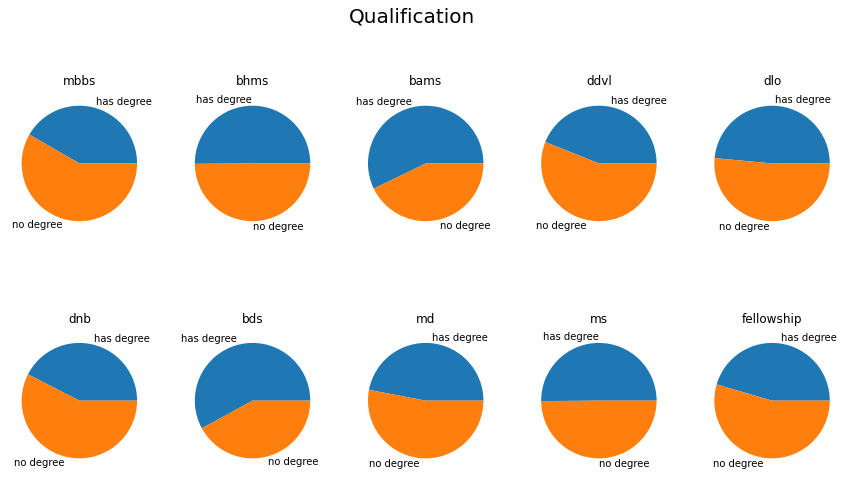

In [24]:


col1=['mbbs','bhms','bams','ddvl','dlo','dnb','bds','md','ms','fellowship']
lab=['has degree','no degree']
fig,axes=plt.subplots(2,5,figsize=(15,8))
fig.suptitle('Qualification',fontsize=20)
k=1
for col in col1:
  arr=[]
  for i in range(2):
    x=train[train[col]==i]
    arr.append(np.mean(x['Fees']))
  plt.subplot(2,5,k)
  k+=1 
  plt.title(col)
  plt.pie(arr,labels=lab)
plt.show()





It is not showing a greater influence of any singular degree . So we are going to sum up and check again.


In [25]:
col2=['mbbs','bhms','bams','ddvl','dlo','mlo','dnb','bds','md','ms','fellowship']
summ=np.zeros(len(train))
for i in col2:
  arr=train[i]
  summ=np.add(summ,arr)
temp_df=pd.DataFrame({'qual':summ,'fees':train['Fees']})     # created a dataframe adding all the qualifications into one.

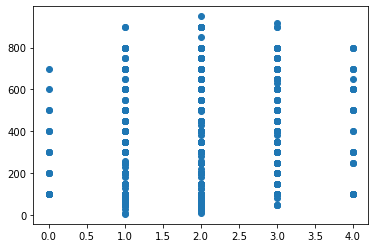

In [26]:
plt.scatter(temp_df['qual'],temp_df['fees'])

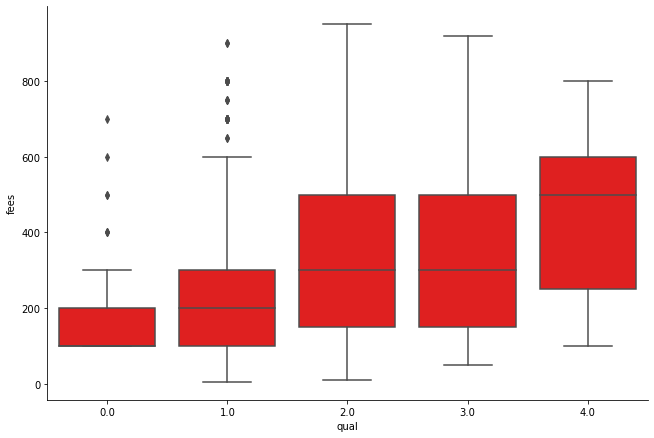

In [27]:
sns.catplot(x='qual',y='fees', data=temp_df.sort_values("fees"),kind='box',height=6,aspect= 1.5,color='r')
plt.show()




This catplot shows that the charges also vary with the total qualification of the doctors. They increase with increase in number of degrees.


#### Profile


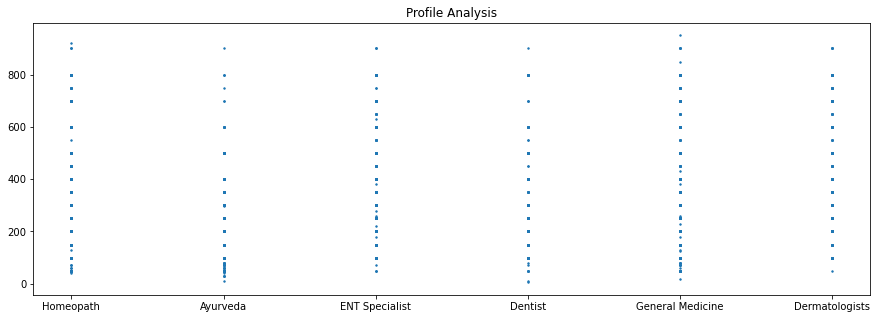

In [28]:
plt.figure(figsize=(15,5))
plt.title('Profile Analysis')

plt.scatter(train['Profile'],train['Fees'],s=2)
plt.show()

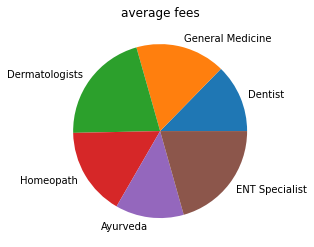

In [29]:
arr=[]
for i in profile:
  x=train[train['Profile']==i]
  arr.append(np.mean(x['Fees']))
plt.title('average fees')
plt.pie(arr,labels=profile)
plt.show()



It states that 'Ayurveda' doctors earns some less than others.

whereas the 'Dermatologists' and the 'ENT' specialists are earning more.


#### Experience

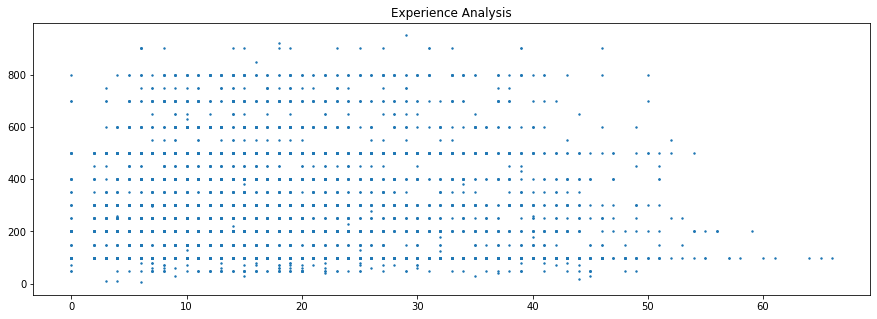

In [30]:
plt.figure(figsize=(15,5))
plt.title('Experience Analysis')

plt.scatter(train['Experience'],train['Fees'],s=2)
plt.show()




The experience doesn't look quite corelated with the fees.


#### Area

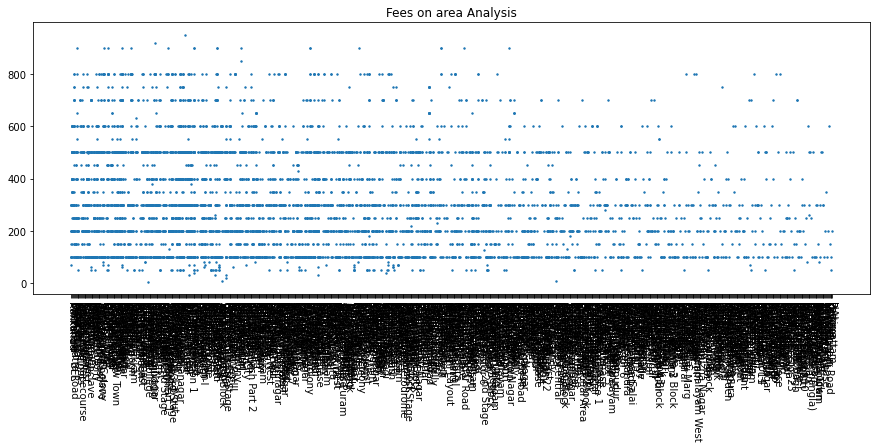

In [31]:
plt.figure(figsize=(15,5))
plt.title('Fees on area Analysis')

plt.scatter(train['Area'],train['Fees'],s=2)
plt.xticks(rotation=270)
plt.show()



Already the curve shows that this features doesn't varies on wages.




#### City


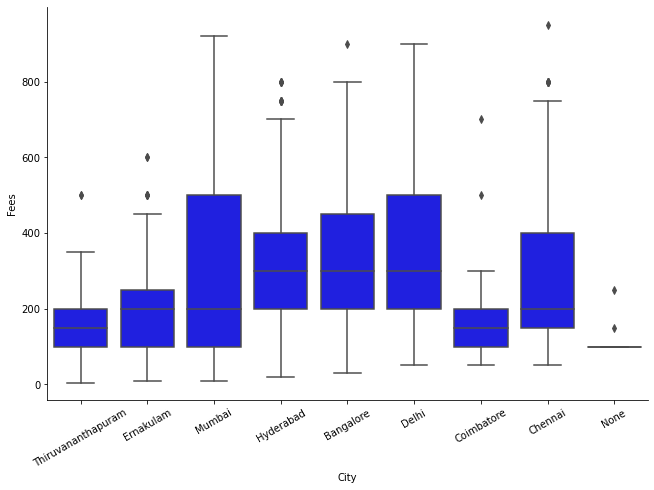

In [32]:
sns.catplot(x='City',y='Fees', data=train.sort_values("Fees"),kind='box',height=6,aspect= 1.5,color='b')
plt.xticks(rotation=30)
plt.show()

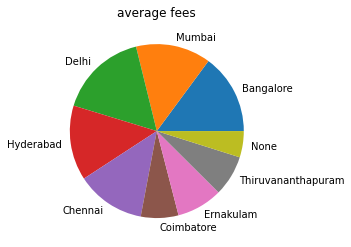

In [33]:
arr=[]
for i in City:
  x=train[train['City']==i]
  arr.append(np.mean(x['Fees']))
plt.title('average fees')
plt.pie(arr,labels=City)
plt.show()

It shows that the cities are highly correlated with the wages or charges of the doctor.


#### Rating

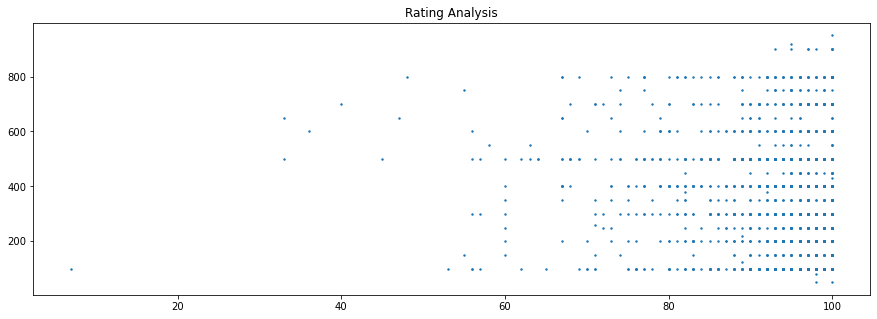

In [34]:
xx=train[train['Rating']>=0.0]
plt.figure(figsize=(15,5))
plt.title('Rating Analysis')

plt.scatter(xx['Rating'],xx['Fees'],s=2)
plt.show()



Similarly the rating is aslo not giving high correlation with features.


#### Miscellaneous Info

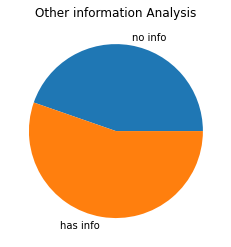

In [35]:
arr=[]
for i in range(2):
  x=train[train['Miscellaneous_Info']==i]
  arr.append(np.mean(x['Fees']))
plt.title('Other information Analysis')
lab=['no info','has info']

plt.pie(arr,labels=lab)
plt.show()

It is seen that the soctors having other info charges more than others.


#### Final Pre-processing

We've seen that the qualifications are not informative as segragated but when treated as one. so we are going to drop those features and add a summed version to it.


In [36]:
train.drop(labels=col2,axis=1,inplace=True)
qual=temp_df['qual']                                         
qual=to_df(qual)
train=pd.concat([qual,train],axis=1)
train.head()



,qual,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,3.0,24,100,Homeopath,1.0,100,Kakkanad,Ernakulam
1,3.0,12,98,Ayurveda,1.0,350,Whitefield,Bangalore
2,2.0,9,-99999,ENT Specialist,0.0,300,Mathikere - BEL,Bangalore
3,2.0,12,-99999,Ayurveda,1.0,250,Bannerghatta Road,Bangalore
4,2.0,20,100,Ayurveda,1.0,250,Keelkattalai,Chennai


In [37]:
summ=np.zeros(len(test))
for i in col2:
  arr=test[i]
  summ=np.add(summ,arr)
temp_df=pd.DataFrame({'qual':summ})
test.drop(labels=col2,axis=1,inplace=True)
test=pd.concat([temp_df,test],axis=1)


### Encoding

In [38]:
profile

Index(['Dentist', 'General Medicine', 'Dermatologists', 'Homeopath',
       'Ayurveda', 'ENT Specialist'],
      dtype='object')

In [39]:
def encode(str):
  scaler=LabelEncoder()
  ar1=train[str]
  ar1=scaler.fit_transform(ar1)
  train[str]=ar1
  ar2=test[str]
  ar2=scaler.transform(ar2)
  test[str]=ar2
    

In [40]:
encode('Profile')
encode('City')

In [41]:


x1=train['Area']
x2=test['Area']
try:
  encode('Area')
except:
  print('ERROR ! New area token found in test.')
  train['Area']=x1
  test['Area']=x2



ERROR ! New area token found in test.




The area has one extra data in test so we are manually encoding the 'area'.


In [42]:
xx=train['Area'].value_counts().index
xy=test['Area'].value_counts().index
xx=to_df(xx)
xy=to_df(xy)

In [43]:
x3=pd.concat([xx,xy],axis=0)
x3.columns=['0']
a1=x3['0'].value_counts().index
i=0
for val in a1:
  train['Area'].replace(val,int(i),inplace=True)
  test['Area'].replace(val,int(i),inplace=True)
  i+=1

In [44]:
test.head()

,qual,Experience,Rating,Profile,Miscellaneous_Info,Area,City
0,1.0,35,-99999,4,0.0,427,6
1,2.0,31,-99999,3,0.0,310,5
2,2.0,40,70,2,1.0,214,1
3,2.0,0,-99999,0,0.0,192,3
4,2.0,16,100,1,1.0,41,0




Now we have encoded and prepared the train and test data for model fitting and evaluation.



#### X and Y generation :

we are going to split the X_train and y_train from the train and simply declare the test as X_train as it does not possess any target values.


In [45]:
X_train=train.drop('Fees',1)
y_train=train['Fees']
X_test=test


In [46]:
print('shape of the X and Y s')
X_train.shape,y_train.shape,X_test.shape

shape of the X and Y s


((5961, 7), (5961,), (1987, 7))

In [47]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qual                5961 non-null   float64
 1   Experience          5961 non-null   int64  
 2   Rating              5961 non-null   int64  
 3   Profile             5961 non-null   int64  
 4   Miscellaneous_Info  5961 non-null   float64
 5   Area                5961 non-null   int64  
 6   City                5961 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 326.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qual                1987 non-null   float64
 1   Experience          1987 non-null   int64  
 2   Rating              1987 non-null   int64  
 3   Profile             1987 non-null   int6


### Model selection and fitting :



Testing diffrent models

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import GridSearchCV 

Modelperformance={}
model=[LinearRegression(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),RandomForestRegressor()]
for i in model:
    model1=i
    i.fit(X_train,y_train)
    AC=i.score(X_train,y_train)
    Modelperformance[i] = AC
    
print(Modelperformance)

{LinearRegression(): 0.0898779913281772, KNeighborsRegressor(): 0.3151388132990446, SVR(): -0.009022253567477101, DecisionTreeRegressor(): 0.9967618049542033, RandomForestRegressor(): 0.8823690928479916}


#### Decision Tree Regressor

In [61]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_train)
print('RMSE loss in train :',np.sqrt(mean_squared_error(y_train,y_pred)))
dtr.score(X_train,y_train)

RMSE loss in train : 10.863439384996212


0.9967618049542033



#### Random Forest


In [51]:


clf=RandomForestRegressor(random_state=0,criterion='mse')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_train)
print('RMSE loss in train :',np.sqrt(mean_squared_error(y_train,y_pred)))



RMSE loss in train : 64.97093143593864


In [53]:


clf.score(X_train,y_train)



0.8841738825087153



If we drop the Area column we can get

In [54]:
X_tr=X_train.drop('Area',1)
clf.fit(X_tr,y_train)
y_pred=clf.predict(X_tr)
print('RMSE loss in train :',np.sqrt(mean_squared_error(y_train,y_pred)))
print('Accuracy of the model :',clf.score(X_tr,y_train))

RMSE loss in train : 99.91901019851863
Accuracy of the model : 0.7260542547803678


We found out that area is a valuable feature for the data .

In [55]:
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [56]:
clf.fit(X_tr,y_tr)
y_pred=clf.predict(X_tr)
print('RMSE loss in train :',np.sqrt(mean_squared_error(y_tr,y_pred)))
y_pred=clf.predict(X_val)
print('RMSE loss in validation :',np.sqrt(mean_squared_error(y_val,y_pred)))

RMSE loss in train : 65.62514080433073
RMSE loss in validation : 175.24201112608478




It shows that the model is not overfitted and we can move forward.


In [57]:
y_prediction=clf.predict(X_test)

In [58]:
for i in range(len(y_prediction)):
  print(y_prediction[i])
  break


201.5


In [59]:
def rounding(x):
  m=(x//50)*50
  if m==x:
    return int(x/1.0)
  elif x-m>=25.0:
    return int((m+50)/1.0)
  else:
    return int(m/1.0)

In [60]:
y_fin=[]
for i in range(len(y_prediction)):
  y_fin.append(rounding(y_prediction[i]))
y_fin=pd.DataFrame({'id':np.arange(1,len(y_fin)+1,1),'Fees':y_fin})
print(y_fin.head())

   id  Fees
0   1   200
1   2   350
2   3   500
3   4   200
4   5   250


In [62]:
# Saving Decision Tree Regressor
import joblib
joblib.dump(dtr,'Doctor_fees.pkl')

['Doctor_fees.pkl']

### Conclusion

    The best result is given by Decision Tree Regressor with 99% accuracy.
    The Random Forest Regressor also given second best accuracy score of 88%.